# New York City Traffic Collision Analysis

In [228]:
import pandas as pd
import numpy as np
from pandas import Timestamp
import datetime as dt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [229]:
df=pd.read_csv('data.csv')

/var/folders/05/cg8zfzcx32z45xb1vp42wpy80000gn/T/ipykernel_54096/625188700.py:1: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [230]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032140,07/03/2023,18:05,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2032141,07/22/2023,21:39,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2032142,07/02/2023,17:55,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2032143,07/22/2023,13:15,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


In [231]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [232]:
df.describe().T # statistical summary of data

,count,mean,std,min,25%,50%,75%,max
LATITUDE,1801419.0,4.062777e+01,1.980565e+00,0.00000,4.066791e+01,4.072096e+01,4.076955e+01,4.334444e+01
LONGITUDE,1801419.0,-7.375230e+01,3.726044e+00,-201.35999,-7.397492e+01,-7.392732e+01,-7.386670e+01,0.000000e+00
NUMBER OF PERSONS INJURED,2032127.0,3.043850e-01,6.954015e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.300000e+01
NUMBER OF PERSONS KILLED,2032114.0,1.455627e-03,4.019828e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
NUMBER OF PEDESTRIANS INJURED,2032145.0,5.540550e-02,2.418081e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01
NUMBER OF PEDESTRIANS KILLED,2032145.0,7.253419e-04,2.741148e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
NUMBER OF CYCLIST INJURED,2032145.0,2.640117e-02,1.622807e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
NUMBER OF CYCLIST KILLED,2032145.0,1.131809e-04,1.068421e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
NUMBER OF MOTORIST INJURED,2032145.0,2.192658e-01,6.565184e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.300000e+01
NUMBER OF MOTORIST KILLED,2032145.0,5.959220e-04,2.662232e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


In [233]:
# Step 2: Handle Missing Values
df.shape

(2032145, 29)

In [234]:
# df.dropna()
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           632163
ZIP CODE                          632404
LATITUDE                          230726
LONGITUDE                         230726
LOCATION                          230726
ON STREET NAME                    428678
CROSS STREET NAME                 762574
OFF STREET NAME                  1695840
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6432
CONTRIBUTING FACTOR VEHICLE 2     311013
CONTRIBUTING FACTOR VEHICLE 3    1887770
CONTRIBUTING FACTOR VEHICLE 4    1999711
CONTRIBUTING FACTOR VEHICLE 5    2023370
COLLISION_ID                           0
VEHICLE TYPE COD

In [186]:
# Step 3: Dropping unwanted columns with more percentage of missing/null values
columns_to_drop = ['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 
                   'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 
                   'OFF STREET NAME', 'CROSS STREET NAME', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME']
df.drop(columns=columns_to_drop, inplace=True)
df.dropna()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
7,12/14/2021,8:17,BRONX,10475.0,2.0,0.0,0,0,0,0,2,0,Unspecified,Unspecified,4486660,Sedan,Sedan
9,12/14/2021,14:58,MANHATTAN,10017.0,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,4486519,Sedan,Station Wagon/Sport Utility Vehicle
11,12/14/2021,16:50,QUEENS,11413.0,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,4487127,Sedan,Station Wagon/Sport Utility Vehicle
14,12/14/2021,23:10,QUEENS,11434.0,2.0,0.0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,4486635,Sedan,Sedan
15,12/14/2021,17:58,BROOKLYN,11217.0,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,4486604,Tanker,Station Wagon/Sport Utility Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032130,07/22/2023,13:38,BROOKLYN,11222.0,1.0,0.0,0,0,0,0,1,0,Driver Inexperience,Unspecified,4647863,Station Wagon/Sport Utility Vehicle,Van
2032131,07/22/2023,14:08,QUEENS,11413.0,2.0,0.0,0,0,0,0,2,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4647947,Sedan,Sedan
2032133,07/20/2023,14:59,BROOKLYN,11203.0,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,4648122,Van,PK
2032135,07/22/2023,11:00,BROOKLYN,11249.0,1.0,0.0,0,0,1,0,0,0,Passing Too Closely,Unspecified,4648297,Bike,Sedan


In [235]:
# step 4: Rearranging the columns and selecting columns
selected_features = [
    'CRASH DATE', 'CRASH TIME', 'BOROUGH',
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
    'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2','COLLISION_ID'
]
df = df[selected_features]

In [236]:
# Step 5: Dropping Na values and Reset Index
df = df.dropna()


In [237]:
df.isnull().sum()

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
COLLISION_ID                     0
dtype: int64

In [238]:
df = df.reset_index(drop=True)
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,COLLISION_ID
0,12/14/2021,8:17,BRONX,2.0,0.0,0,0,0,0,2,0,Unspecified,Unspecified,Sedan,Sedan,4486660
1,12/14/2021,14:58,MANHATTAN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,4486519
2,12/14/2021,16:50,QUEENS,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,4487127
3,12/14/2021,23:10,QUEENS,2.0,0.0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,Sedan,Sedan,4486635
4,12/14/2021,17:58,BROOKLYN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Tanker,Station Wagon/Sport Utility Vehicle,4486604


In [239]:
# Step 6: Check for any duplicates in data
df.duplicated().sum()

0

In [240]:
# Step 7: Convert Date and Time to DateTime Objects
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.time
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,COLLISION_ID
0,2021-12-14,08:17:00,BRONX,2.0,0.0,0,0,0,0,2,0,Unspecified,Unspecified,Sedan,Sedan,4486660
1,2021-12-14,14:58:00,MANHATTAN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,4486519
2,2021-12-14,16:50:00,QUEENS,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,4487127
3,2021-12-14,23:10:00,QUEENS,2.0,0.0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,Sedan,Sedan,4486635
4,2021-12-14,17:58:00,BROOKLYN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Tanker,Station Wagon/Sport Utility Vehicle,4486604


In [241]:
# Step 8: Extract Day of the Week
df['DAY OF WEEK'] = df['CRASH DATE'].dt.day_name()
df.shape

(1103723, 17)

In [242]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,COLLISION_ID,DAY OF WEEK
0,2021-12-14,08:17:00,BRONX,2.0,0.0,0,0,0,0,2,0,Unspecified,Unspecified,Sedan,Sedan,4486660,Tuesday
1,2021-12-14,14:58:00,MANHATTAN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,4486519,Tuesday
2,2021-12-14,16:50:00,QUEENS,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,4487127,Tuesday
3,2021-12-14,23:10:00,QUEENS,2.0,0.0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,Sedan,Sedan,4486635,Tuesday
4,2021-12-14,17:58:00,BROOKLYN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Tanker,Station Wagon/Sport Utility Vehicle,4486604,Tuesday


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103723 entries, 0 to 1103722
Data columns (total 17 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   CRASH DATE                     1103723 non-null  datetime64[ns]
 1   CRASH TIME                     1103723 non-null  object        
 2   BOROUGH                        1103723 non-null  object        
 3   NUMBER OF PERSONS INJURED      1103723 non-null  float64       
 4   NUMBER OF PERSONS KILLED       1103723 non-null  float64       
 5   NUMBER OF PEDESTRIANS INJURED  1103723 non-null  int64         
 6   NUMBER OF PEDESTRIANS KILLED   1103723 non-null  int64         
 7   NUMBER OF CYCLIST INJURED      1103723 non-null  int64         
 8   NUMBER OF CYCLIST KILLED       1103723 non-null  int64         
 9   NUMBER OF MOTORIST INJURED     1103723 non-null  int64         
 10  NUMBER OF MOTORIST KILLED      1103723 non-null  int64

In [244]:
# Step 9: changing data types of columns

# Converting 'NUMBER OF PERSONS INJURED' to integer
df['NUMBER OF PERSONS INJURED'] = df['NUMBER OF PERSONS INJURED'].astype(int)

# Converting 'NUMBER OF PERSONS KILLED' to integer
df['NUMBER OF PERSONS KILLED'] = df['NUMBER OF PERSONS KILLED'].astype(int)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103723 entries, 0 to 1103722
Data columns (total 17 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   CRASH DATE                     1103723 non-null  datetime64[ns]
 1   CRASH TIME                     1103723 non-null  object        
 2   BOROUGH                        1103723 non-null  object        
 3   NUMBER OF PERSONS INJURED      1103723 non-null  int64         
 4   NUMBER OF PERSONS KILLED       1103723 non-null  int64         
 5   NUMBER OF PEDESTRIANS INJURED  1103723 non-null  int64         
 6   NUMBER OF PEDESTRIANS KILLED   1103723 non-null  int64         
 7   NUMBER OF CYCLIST INJURED      1103723 non-null  int64         
 8   NUMBER OF CYCLIST KILLED       1103723 non-null  int64         
 9   NUMBER OF MOTORIST INJURED     1103723 non-null  int64         
 10  NUMBER OF MOTORIST KILLED      1103723 non-null  int64

In [246]:
# Step 10: Adding a new column to dataframe based on understaning
def classify_severity(row):
    total_injuries = row['NUMBER OF PERSONS INJURED'] + row['NUMBER OF PEDESTRIANS INJURED'] + row['NUMBER OF CYCLIST INJURED'] + row['NUMBER OF MOTORIST INJURED']
    total_fatalities = row['NUMBER OF PERSONS KILLED'] + row['NUMBER OF PEDESTRIANS KILLED'] + row['NUMBER OF CYCLIST KILLED'] + row['NUMBER OF MOTORIST KILLED']
    
    if total_fatalities > 0:
        return 3  # High Severity
    elif total_injuries > 0:
        return 2  # Moderate Severity
    else:
        return 1  # Low Severity

In [247]:
df['SEVERITY_CLASS'] = df.apply(classify_severity, axis=1)
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,COLLISION_ID,DAY OF WEEK,SEVERITY_CLASS
0,2021-12-14,08:17:00,BRONX,2,0,0,0,0,0,2,0,Unspecified,Unspecified,Sedan,Sedan,4486660,Tuesday,2
1,2021-12-14,14:58:00,MANHATTAN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,4486519,Tuesday,1
2,2021-12-14,16:50:00,QUEENS,0,0,0,0,0,0,0,0,Turning Improperly,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,4487127,Tuesday,1
3,2021-12-14,23:10:00,QUEENS,2,0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,Sedan,Sedan,4486635,Tuesday,2
4,2021-12-14,17:58:00,BROOKLYN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,Tanker,Station Wagon/Sport Utility Vehicle,4486604,Tuesday,1


In [200]:
# df.to_csv('final.csv')

In [248]:
# Step 11: Describing summary of final numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NUMBER OF PERSONS INJURED,1103723.0,2.624028e-01,6.858638e-01,0.0,0.0,0.0,0.0,43.0
NUMBER OF PERSONS KILLED,1103723.0,6.831424e-04,2.838830e-02,0.0,0.0,0.0,0.0,8.0
NUMBER OF PEDESTRIANS INJURED,1103723.0,3.139375e-03,6.903480e-02,0.0,0.0,0.0,0.0,15.0
NUMBER OF PEDESTRIANS KILLED,1103723.0,1.250314e-04,1.276984e-02,0.0,0.0,0.0,0.0,6.0
NUMBER OF CYCLIST INJURED,1103723.0,3.379834e-02,1.826100e-01,0.0,0.0,0.0,0.0,4.0
NUMBER OF CYCLIST KILLED,1103723.0,1.331856e-04,1.161809e-02,0.0,0.0,0.0,0.0,2.0
NUMBER OF MOTORIST INJURED,1103723.0,2.219642e-01,6.652038e-01,0.0,0.0,0.0,0.0,43.0
NUMBER OF MOTORIST KILLED,1103723.0,4.058989e-04,2.136520e-02,0.0,0.0,0.0,0.0,3.0
COLLISION_ID,1103723.0,2.817003e+06,1.651112e+06,22.0,637587.0,3482864.0,4051881.5,4668956.0
SEVERITY_CLASS,1103723.0,1.183014e+00,3.883524e-01,1.0,1.0,1.0,1.0,3.0


# Exploratory Data Analysis


In [249]:
# Step 1: correlation matrix and heatmap
correlation_matrix = df.corr()
correlation_matrix

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,SEVERITY_CLASS
NUMBER OF PERSONS INJURED,1.000000,0.029555,0.120911,0.022943,0.208920,0.000162,0.954231,0.025748,0.071169,0.807025
NUMBER OF PERSONS KILLED,0.029555,1.000000,0.062242,0.494622,-0.001483,0.444746,0.024548,0.758396,0.004497,0.112589
NUMBER OF PEDESTRIANS INJURED,0.120911,0.062242,1.000000,0.106441,-0.003098,0.015294,0.021858,0.010807,-0.002750,0.098202
NUMBER OF PEDESTRIANS KILLED,0.022943,0.494622,0.106441,1.000000,0.001685,0.079277,0.012199,0.016418,-0.000435,0.045810
NUMBER OF CYCLIST INJURED,0.208920,-0.001483,-0.003098,0.001685,1.000000,0.001295,-0.058037,-0.003516,0.039548,0.389495
NUMBER OF CYCLIST KILLED,0.000162,0.444746,0.015294,0.079277,0.001295,1.000000,-0.001715,-0.000218,0.003591,0.053635
NUMBER OF MOTORIST INJURED,0.954231,0.024548,0.021858,0.012199,-0.058037,-0.001715,1.000000,0.026556,0.057233,0.703907
NUMBER OF MOTORIST KILLED,0.025748,0.758396,0.010807,0.016418,-0.003516,-0.000218,0.026556,1.000000,0.003338,0.088887
COLLISION_ID,0.071169,0.004497,-0.002750,-0.000435,0.039548,0.003591,0.057233,0.003338,1.000000,0.098018
SEVERITY_CLASS,0.807025,0.112589,0.098202,0.045810,0.389495,0.053635,0.703907,0.088887,0.098018,1.000000


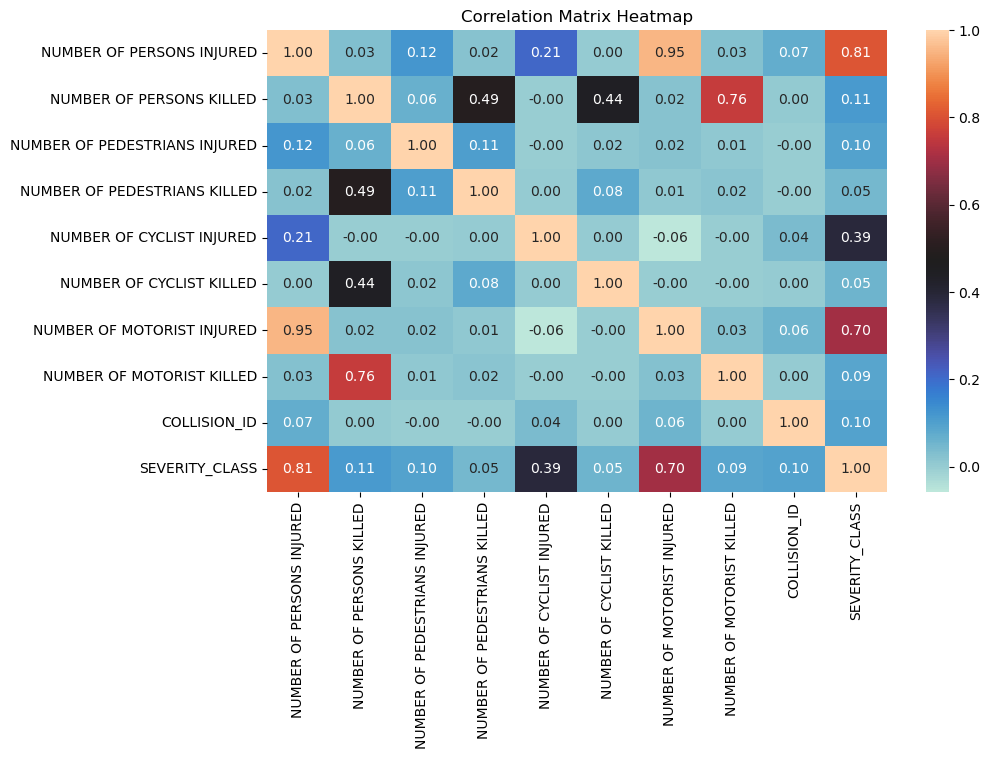

In [250]:
# plot for heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='icefire', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

From the above heatmap and correlation matrix, we can infer that 
- the number of persons injured in a collision increases, the severity of the accident tends to be higher.There is a strong positive correlation of approximately 0.81.
- Number of motorists injured also has high correlation with severity indiocating it as an important feature. 
- There is a very strong positive correlation of approximately 0.954 between the number of persons injured and the number of motorists injured. This suggests that most injuries in accidents involve motorists.
- collision ID has a relatively weak correlation, suggesting that other factors beyond the collision ID contribute significantly to the accident severity.
- Number of persons killed has moderate correlation with number of pedestrians killed with 0.49

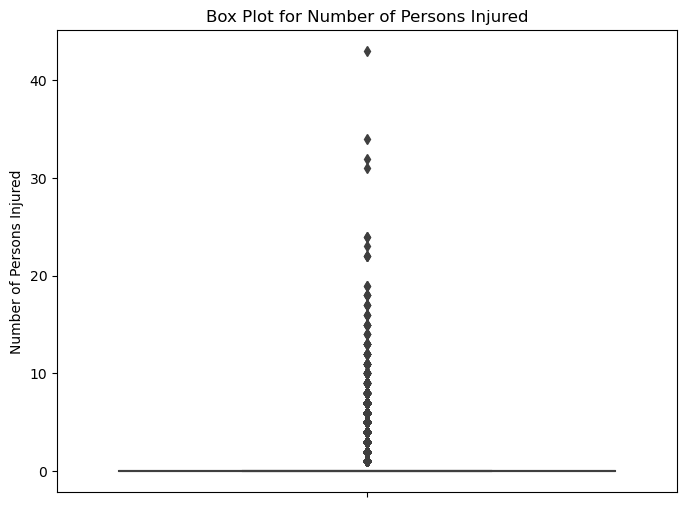

In [251]:
# Step 2: Outliers

#The maximum values are relatively high, especially for "NUMBER OF PERSONS INJURED" and "NUMBER OF MOTORIST INJURED."

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='NUMBER OF PERSONS INJURED')
plt.title('Box Plot for Number of Persons Injured')
plt.ylabel('Number of Persons Injured')
plt.show()

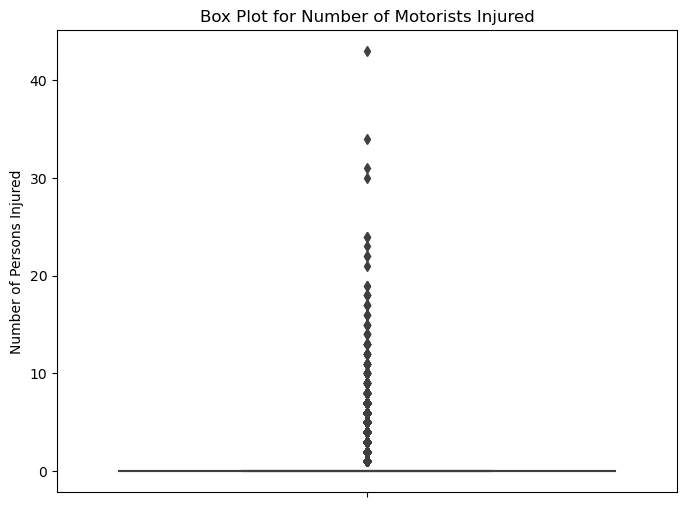

In [252]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='NUMBER OF MOTORIST INJURED')  # Box plot for outliers
plt.title('Box Plot for Number of Motorists Injured')
plt.ylabel('Number of Persons Injured')
plt.show()

From our analysis, we infer that sometimes outliers can add significance to the data. These columns represent counts of injuries and fatalities in accidents, it is  not surprising to have a few instances with significantly higher values. 
So, we intend not to remove outliers in these features.

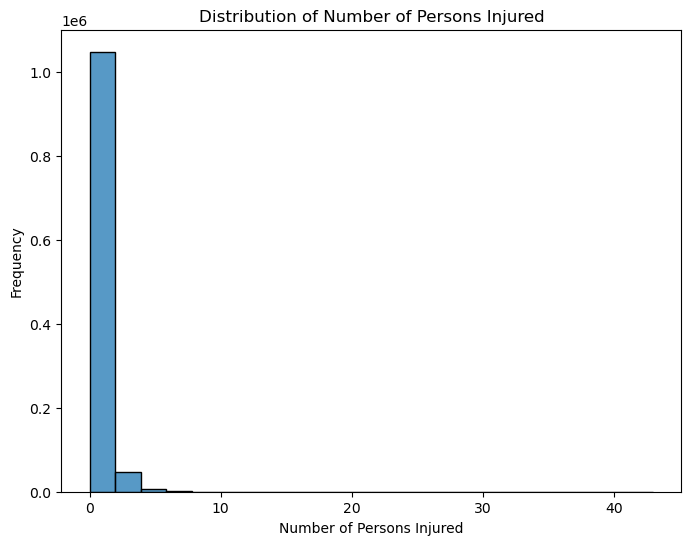

In [253]:
# step 2: Univariate Analysis

plt.figure(figsize=(8, 6))
sns.histplot(df['NUMBER OF PERSONS INJURED'])
plt.title('Distribution of Number of Persons Injured')
plt.xlabel('Number of Persons Injured')
plt.ylabel('Frequency')
plt.show()


In [254]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['Year'] = df['CRASH DATE'].dt.year
df['Month'] = df['CRASH DATE'].dt.month
df['Day'] = df['CRASH DATE'].dt.day
df['Hour'] = df['CRASH DATE'].dt.hour

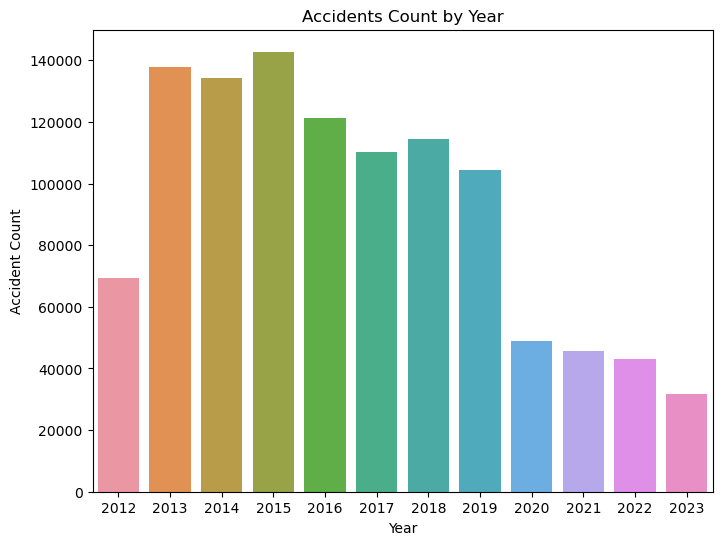

In [255]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Year')
plt.title('Accidents Count by Year')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.show()

We can observe that the amount of accidents is highest in the year of 2015 and observed a decreasing trend from 2018

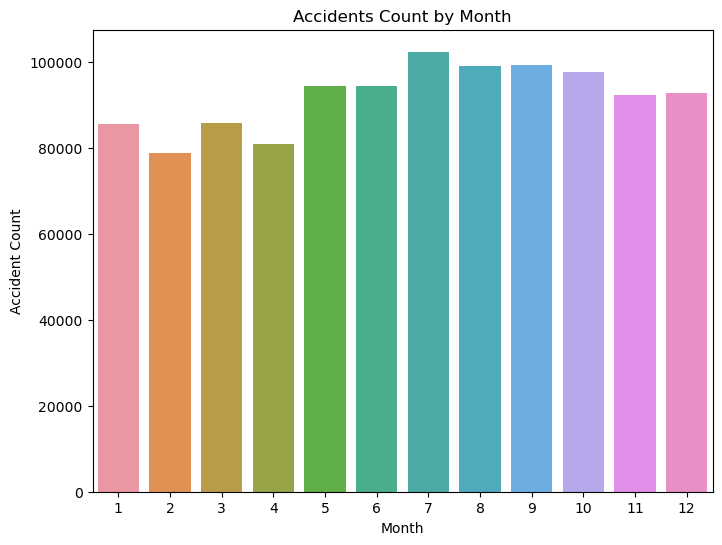

In [256]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Month')
plt.title('Accidents Count by Month')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.show()

The accident count observed is highest in the month of July and following fall months when compared to spring.

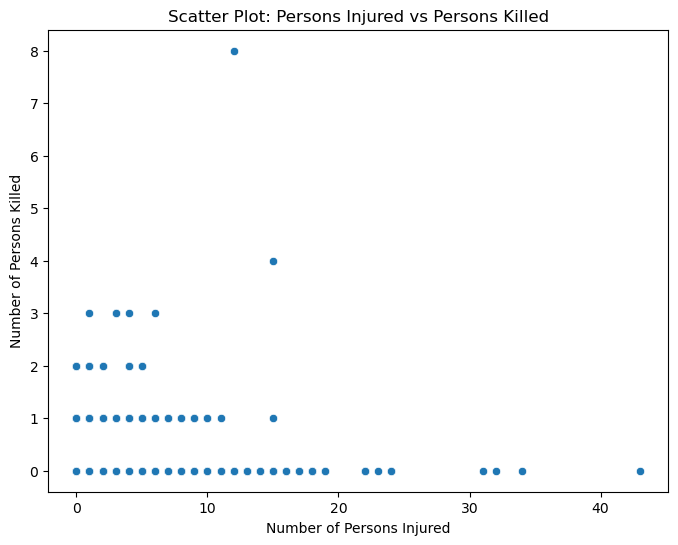

In [257]:
# Bivariate Analysis

plt.figure(figsize=(8, 6))
sns.scatterplot(x='NUMBER OF PERSONS INJURED', y='NUMBER OF PERSONS KILLED', data=df)  # Scatter plot
plt.title('Scatter Plot: Persons Injured vs Persons Killed')
plt.xlabel('Number of Persons Injured')
plt.ylabel('Number of Persons Killed')
plt.show()


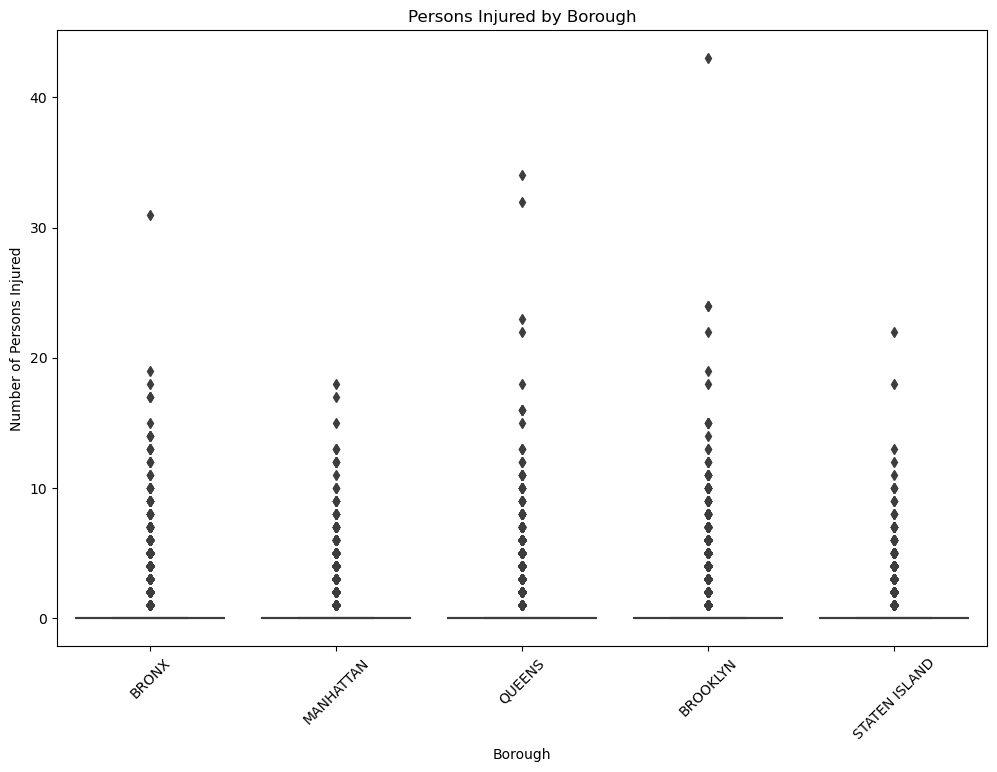

In [258]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='BOROUGH', y='NUMBER OF PERSONS INJURED', data=df)
plt.title('Persons Injured by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Persons Injured')
plt.xticks(rotation=45)
plt.show()



/var/folders/05/cg8zfzcx32z45xb1vp42wpy80000gn/T/ipykernel_54096/1213305993.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



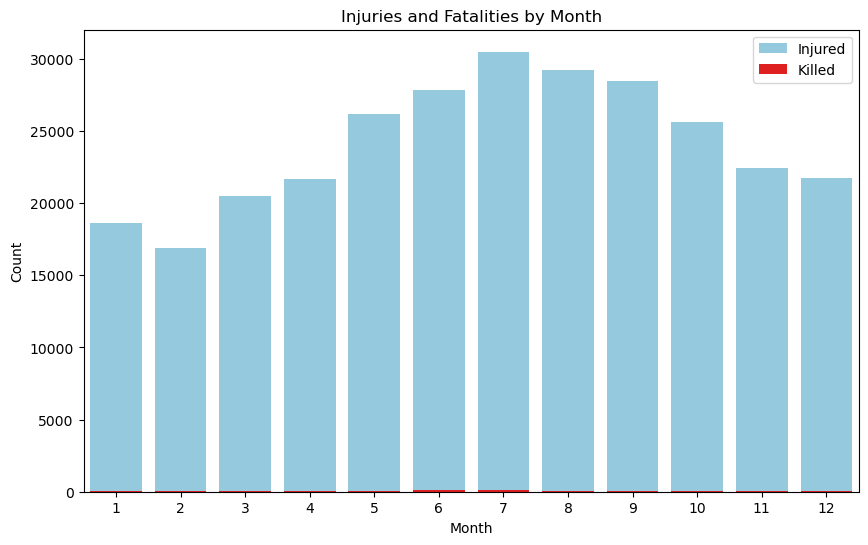

In [259]:
injury_by_month = df.groupby('Month')['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED'].sum().reset_index()
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='NUMBER OF PERSONS INJURED', data=injury_by_month, color='skyblue', label='Injured')
sns.barplot(x='Month', y='NUMBER OF PERSONS KILLED', data=injury_by_month, color='red', label='Killed')
plt.title('Injuries and Fatalities by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()


The bar plot shows the injured and killed count month wise which appears to be highest in July and killed people count is less when compared to injured count.

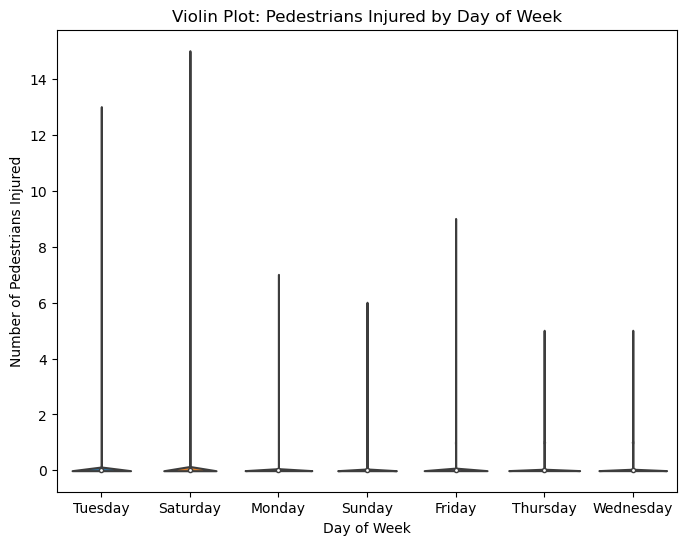

In [260]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='DAY OF WEEK', y='NUMBER OF PEDESTRIANS INJURED', data=df)  # Voilin Plot
plt.title('Violin Plot: Pedestrians Injured by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pedestrians Injured')
plt.show()


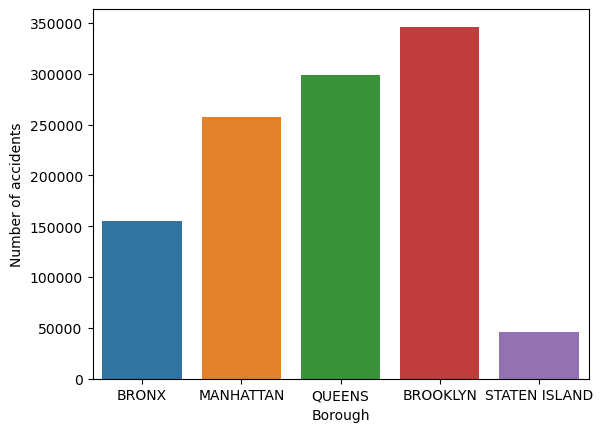

In [261]:
sns.countplot(x='BOROUGH', data=df)
plt.xlabel('Borough')
plt.ylabel('Number of accidents')
plt.show()

The bar graph shows the total number of accidents occured for each value of Borough

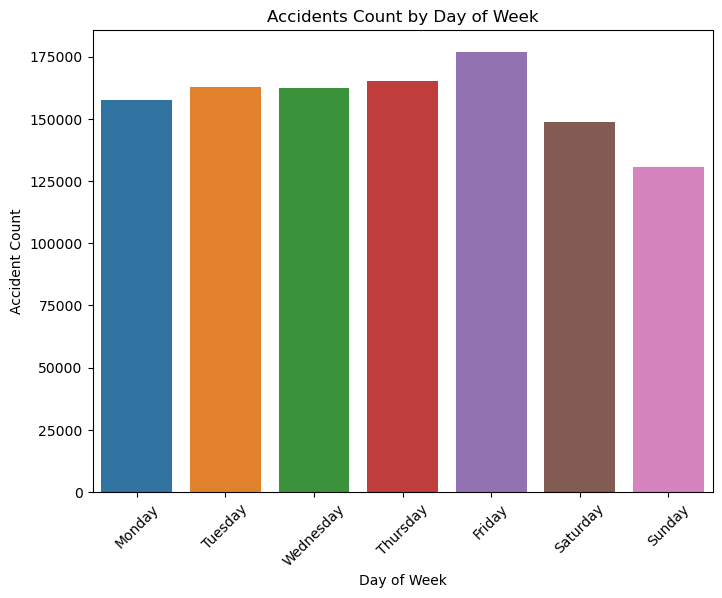

In [262]:
# Categorical Variable Analysis

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DAY OF WEEK', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()


Also, the start of weekend i.e. Friday records most number of accidents.

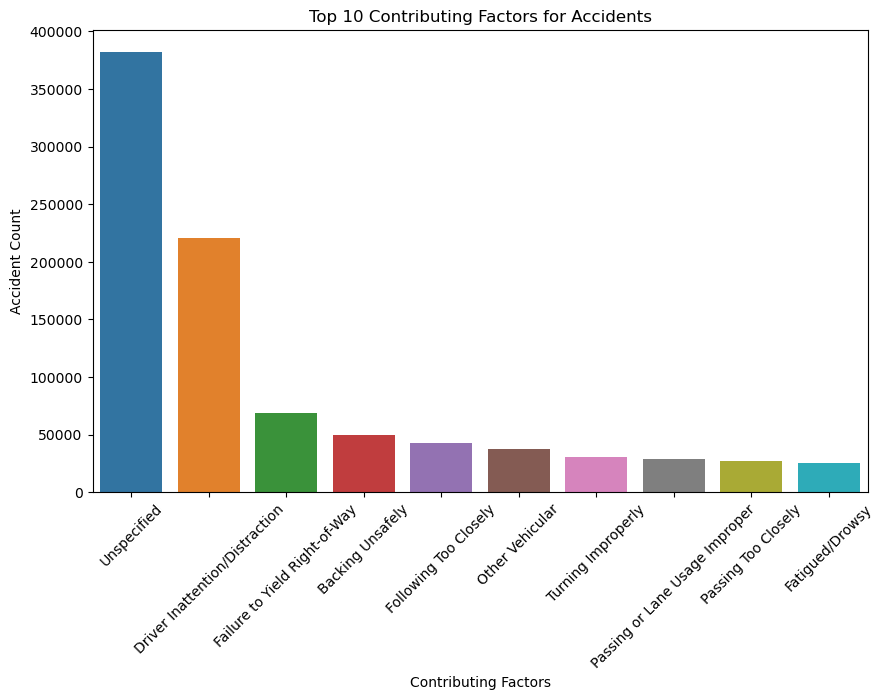

In [263]:
high_contributing_factors = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=high_contributing_factors.index, y=high_contributing_factors.values)
plt.title('Top 10 Contributing Factors for Accidents')
plt.xlabel('Contributing Factors')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()


We can see that most of the reasons are quite rare, and we have considered around 10 significant reasons for accidents. Lets see if the major causes differ when taking the severity of the accident into account 

<Figure size 1200x800 with 0 Axes>

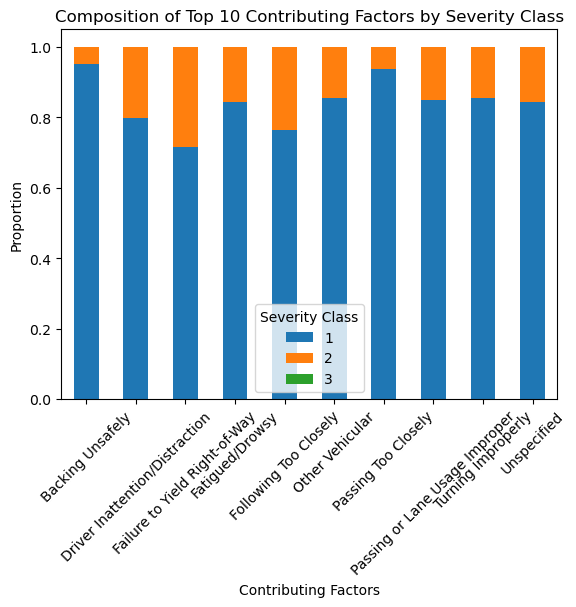

In [264]:
top_contributing_factors = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10).index
filtered_df = df[df['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_contributing_factors)]

# Creating a crosstab to calculate proportions of each contributing factor for each severity class
severity_factor_crosstab = pd.crosstab(filtered_df['CONTRIBUTING FACTOR VEHICLE 1'], filtered_df['SEVERITY_CLASS'], normalize='index')
plt.figure(figsize=(12, 8))
severity_factor_crosstab.plot(kind='bar', stacked=True)
plt.title('Composition of Top 10 Contributing Factors by Severity Class')
plt.xlabel('Contributing Factors')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Severity Class')
plt.show()


We can say that the contributing factors for  proportion of vehicles which caused accidents with severity class as 1 is 'Backing unsafely' followed by passing too closely and severity class 2 is 'Failure to yield Right of way' followed by 'Following too closely'

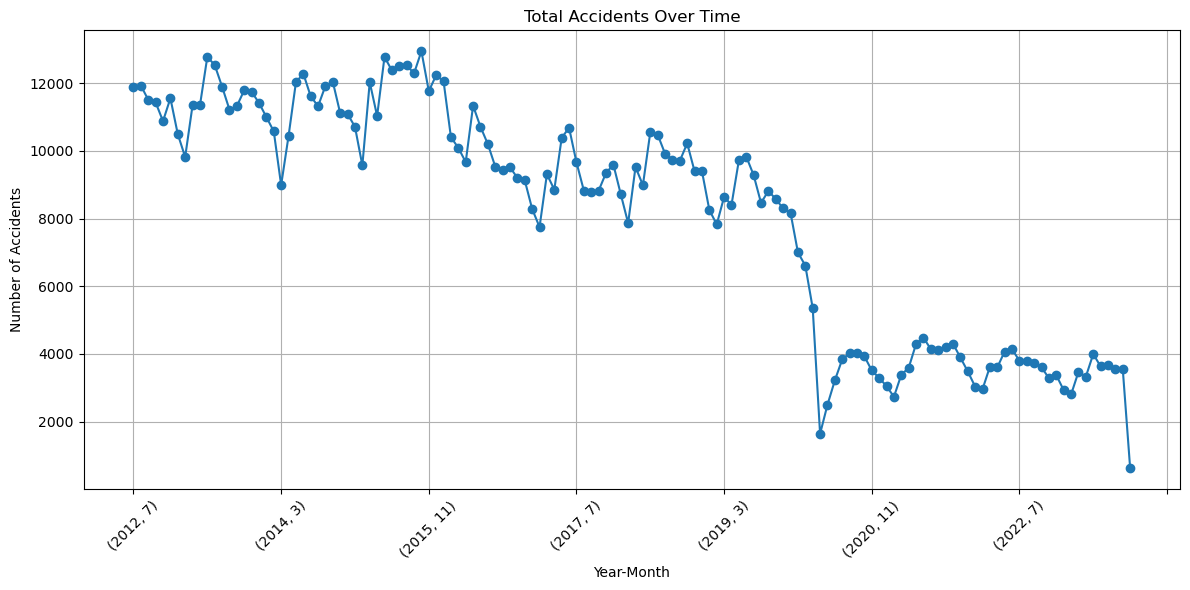

In [265]:
df['Year'] = df['CRASH DATE'].dt.year
df['Month'] = df['CRASH DATE'].dt.month
monthly_accidents = df.groupby(['Year', 'Month']).size()  # Grouping by 'Year' and 'Month' and calculating the total number of accidents in each month.
plt.figure(figsize=(12, 6))
monthly_accidents.plot(kind='line', marker='o')
plt.title('Total Accidents Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The above plot shows the the total accidennts over time - monthly and we can say there is a decreasing trend yearly from 2012 and also there's steep decrease in the month of April 2020

In [266]:
# Feature Engineering

# Creating a new column 'TOTAL INJURED'
df['TOTAL INJURED'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PEDESTRIANS INJURED'] + df['NUMBER OF CYCLIST INJURED'] + df['NUMBER OF MOTORIST INJURED']

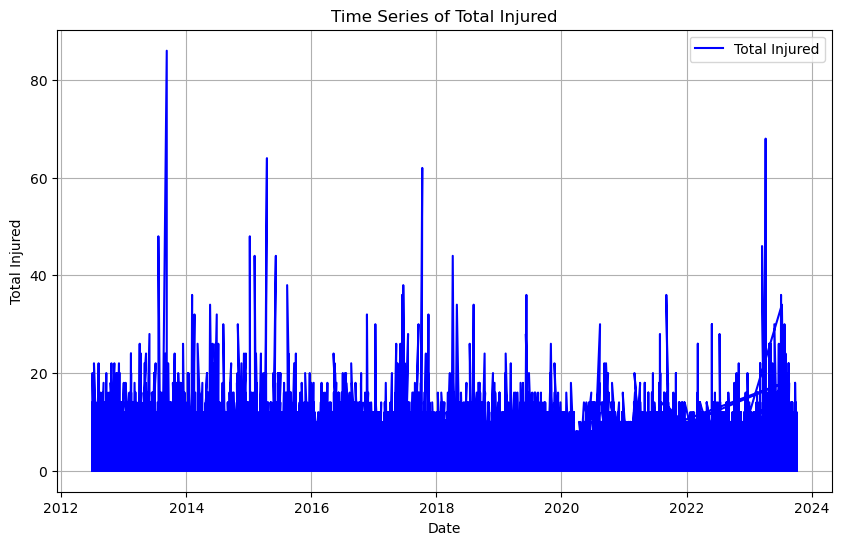

In [267]:
# Converting 'CRASH DATE' to datetime 
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Setting 'CRASH DATE' as the index for time series analysis 
df.set_index('CRASH DATE', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TOTAL INJURED'], label='Total Injured', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Injured')
plt.title('Time Series of Total Injured')
plt.legend()
plt.grid(True)
plt.show()

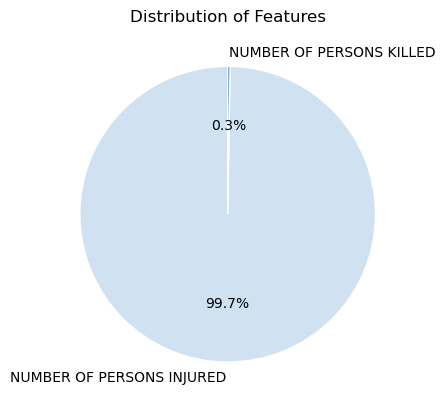

In [268]:
# Extracting the sum of values for the specific feature names from the DataFrame.
feature_names = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']
#                  'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED']
feature_values = df[feature_names].sum().values  

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(feature_names)))
fig, ax = plt.subplots()
ax.pie(feature_values, labels=feature_names, colors=colors, autopct='%1.1f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, startangle=90)

ax.set_title('Distribution of Features')
plt.show()



The pie chart shows the percentage of number of persons killed out of total number of persons injured.

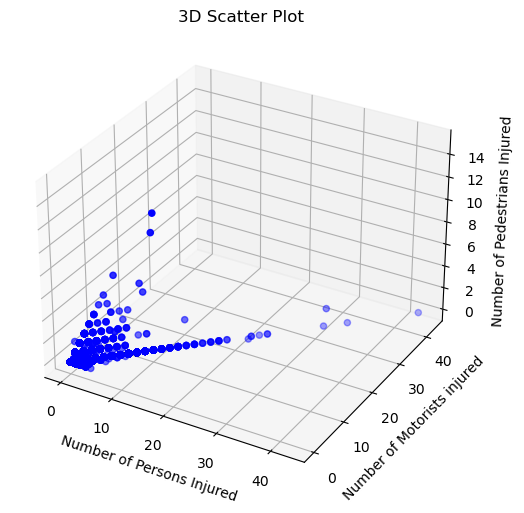

In [269]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = df['NUMBER OF PERSONS INJURED']
y = df['NUMBER OF MOTORIST INJURED']
z = df['NUMBER OF PEDESTRIANS INJURED']

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('Number of Persons Injured')
ax.set_ylabel('Number of Motorists injured')
ax.set_zlabel('Number of Pedestrians Injured')

plt.title('3D Scatter Plot')
plt.show()


The 3D scatter plot shows that the data points are closely related as nuber of persons injured and number of morotists injured on x and y axes respectively are highly correlated 

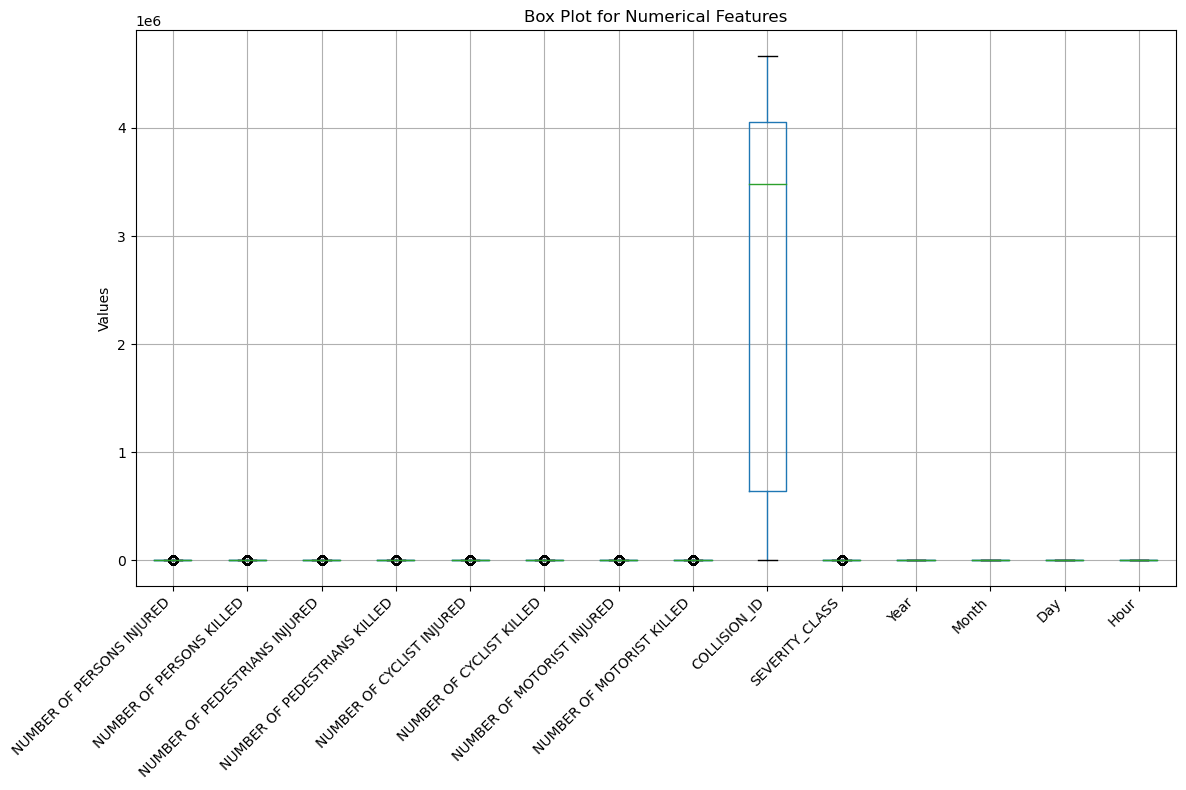

In [270]:
numerical_columns = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 
                     'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
                     'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
                     'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
                     'COLLISION_ID', 'SEVERITY_CLASS', 'Year', 'Month', 'Day', 'Hour']

# Creating box plots for all numerical columns
plt.figure(figsize=(12, 8))
df[numerical_columns].boxplot()
plt.title('Box Plot for Numerical Features')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [271]:
# Removing Feature 'COLLISION_ID'

df = df.drop(columns = 'COLLISION_ID')
df.head()

,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,DAY OF WEEK,SEVERITY_CLASS,Year,Month,Day,Hour,TOTAL INJURED
CRASH DATE,,,,,,,,,,,,,,,,,,,,,
2021-12-14,08:17:00,BRONX,2,0,0,0,0,0,2,0,...,Unspecified,Sedan,Sedan,Tuesday,2,2021,12,14,0,4
2021-12-14,14:58:00,MANHATTAN,0,0,0,0,0,0,0,0,...,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,Tuesday,1,2021,12,14,0,0
2021-12-14,16:50:00,QUEENS,0,0,0,0,0,0,0,0,...,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,Tuesday,1,2021,12,14,0,0
2021-12-14,23:10:00,QUEENS,2,0,0,0,0,0,2,0,...,Unspecified,Sedan,Sedan,Tuesday,2,2021,12,14,0,4
2021-12-14,17:58:00,BROOKLYN,0,0,0,0,0,0,0,0,...,Unspecified,Tanker,Station Wagon/Sport Utility Vehicle,Tuesday,1,2021,12,14,0,0


The feature 'COLLISION_ID' is insignificant as per the heatmap and correlation matrix data mentioned above. So, we have dropped this column. Although, 'NUMBER OF PERSONS INJURED' and 'NUMBER OF MOTORIST INJURED' have strong positive correlation and provide very similar information about the target variable, we are considering both the columns as there are multiple subset of data(type of people killed/injured) and can be relevant for prediction.

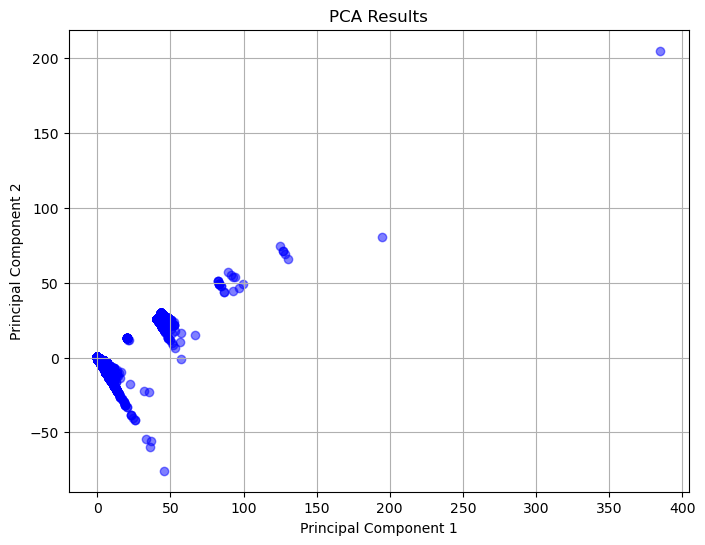

In [272]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


numerical_features = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 
                      'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 
                      'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 
                      'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']

X = df[numerical_features]

# Scaling the data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing PCA
pca = PCA(n_components=2)  # Can adjust the number of components. we chose 2
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='b', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.grid(True)
plt.show()


We considered two PC components because we know that in PCA, first few components capture most significant patterns and the variance in the data.

In [273]:
# Accessing the loadings (coefficients) of each feature for the first two PC's
loadings = pca.components_[:2, :]

loadings_df = pd.DataFrame(data=loadings.T, columns=['PC1', 'PC2'], index=numerical_features)
absolute_loadings = np.abs(loadings_df)    # To find significance

# Sorting features based on their significance for PC1 and PC2
significant_features_pc1 = absolute_loadings.sort_values(by='PC1', ascending=False).index
significant_features_pc2 = absolute_loadings.sort_values(by='PC2', ascending=False).index


print('order of imp features:', significant_features_pc1)
print('order of imp features:', significant_features_pc2)



order of imp features: Index(['NUMBER OF PERSONS KILLED', 'NUMBER OF MOTORIST KILLED',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED'],
      dtype='object')
order of imp features: Index(['NUMBER OF PERSONS INJURED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF MOTORIST KILLED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF PEDESTRIANS INJURED'],
      dtype='object')


From the above PC analysis, both the components have considered these two features namely 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED' as least significant. However,we will not drop the columns considering the effect of performance of model. So, we could experiment by comparing models with and without these features to assess their impact.